In [11]:
from common import *
disable_fig_save = False 
save_loc = 'plots'
save_prefix="pathfinding"
config_common(disable_fig_save=disable_fig_save, save_loc=save_loc, save_prefix=save_prefix)

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import warnings

%config InlineBackend.figure_format = 'svg'

from os import path
from typing import Dict, List, Set

import matplotlib.ticker as mtick
import matplotlib as mpl
from scipy.stats.mstats import gmean
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, ScalarFormatter, LogLocator)
import matplotlib.patches as patches
import matplotlib.patches as mpatches
from matplotlib import rc

import seaborn as sns

In [13]:
init_notebook()
figsize = (7,1.65)
fontsize = 11

In [14]:
dataf = "../../data/simplekv.csv"

In [15]:
!sha256sum $dataf

abd2c2680c1941726afb15555bbc71bef917b150d8e6a74c9cc11c40a6786a1f  ../../data/simplekv.csv


In [16]:
df = pd.read_csv(dataf, index_col=None)
df.index = ['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [17]:
df

,pmdk,snashot,msync
a,1587040698,910504792,468605417702
b,1007637278,834154356,47669721767
c,946767190,834158536,819466331
d,1157601533,986158726,46513528433
e,282299852,185947345,46371894777
f,1861566885,1129882869,468091282149
g,2159256983,1013091611,934814742113


In [18]:
pmdk_col = df['pmdk']
df_norm = df.copy(deep=True)
for col in df:
    df_norm[col] = df[col]/pmdk_col
df_norm

,pmdk,snashot,msync
a,1.0,0.573712,295.269944
b,1.0,0.827832,47.308414
c,1.0,0.881060,0.865542
d,1.0,0.851898,40.180949
e,1.0,0.658687,164.264680
f,1.0,0.606953,251.450155
g,1.0,0.469185,432.933527


In [19]:
Fig.config(12, (8, 2))

Plot saved as `plots/pathfinding/simplekv.png.png`

Plot saved as `plots/pathfinding/simplekv.png.png`

Using pdfcrop on `plots/pathfinding/simplekv.png.png` with command `pdfcrop plots/pathfinding/simplekv.png.pdf plots/pathfinding/simplekv.png.pdf`

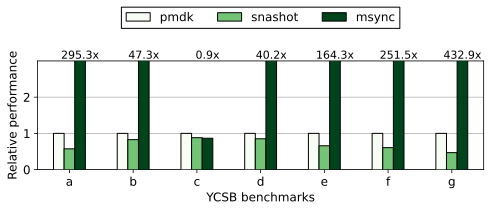

In [20]:
ax = df_norm.plot.bar(**Fig.get_kwargs(cmap='Greens'))
f = Fig(ax)
ax.set_ylim((0, 3))

f.fmt_legend()
f.fmt_label('YCSB benchmarks', 'Relative performance')
f.add_bar_labels([False, False, True])
f.xrot(rot=0)
f.fmt_grid(axis='y')
ax.set_yticks(np.arange(0, 3, 1))
save_fig('simplekv.png')